<a href="https://colab.research.google.com/github/trinalvf/final_year_project/blob/main/MachineLearning/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [ ]:
flow_dataset = pd.read_csv('/content/drive/MyDrive/dataset.csv')

flow_dataset = flow_dataset.drop(columns=['flow_id'])

flow_dataset1 = flow_dataset.iloc[:5000,:]
flow_dataset2 = flow_dataset.iloc[125640:130640,:]
flow_dataset = pd.concat([flow_dataset1, flow_dataset2], ignore_index=True)

#flow_dataset.iloc[:, 2] = flow_dataset.iloc[:, 2].str.replace('.', '')
flow_dataset.iloc[:, 2] = flow_dataset.iloc[:, 2].str.replace('.', '')
flow_dataset.iloc[:, 4] = flow_dataset.iloc[:, 4].str.replace('.', '')

X_flow = flow_dataset.iloc[:, :-1].values
X_flow = X_flow.astype('float64')

y_flow = flow_dataset.iloc[:, -1].values

scaler = StandardScaler()
X_flow = scaler.fit_transform(flow_dataset)

X_flow_train, X_flow_test, y_flow_train, y_flow_test = train_test_split(X_flow, y_flow, test_size=0.25, random_state=0)



In [ ]:
flow_dataset.head()

,timestamp,datapath_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,flow_duration_sec,flow_duration_nsec,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
0,1.589933e+09,1,10001,5050,10003,54246,6,-1,-1,4,480000000,20,100,0,50776,3351216,12694.00,1.057833e-04,8.378040e+05,6.981700e-03,0
1,1.589933e+09,1,10003,54246,10001,5050,6,-1,-1,4,486000000,20,100,0,209360,11834974848,52340.00,4.307819e-04,2.958744e+09,2.435180e+01,0
2,1.589933e+09,1,10003,54246,10005,5050,1,0,8,4,484000000,20,100,0,3,294,0.75,6.198347e-09,7.350000e+01,6.074380e-07,0
3,1.589933e+09,1,10005,54246,10003,5050,1,0,0,4,415000000,20,100,0,3,294,0.75,7.228916e-09,7.350000e+01,7.084337e-07,0
4,1.589933e+09,2,10003,0,10005,0,1,0,8,4,423000000,20,100,0,3,294,0.75,7.092199e-09,7.350000e+01,6.950355e-07,0


In [ ]:
n_features = X_flow_train.shape[1]

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, activation='relu', kernel_initializer='Orthogonal', input_shape=(n_features,)))
#model.add(tf.keras.layers.Dense(30, activation='swish', kernel_initializer='GlorotNormal'))
#model.add(tf.keras.layers.Dense(42, activation='swish', kernel_initializer='RandomUniform'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))
model.compile(optimizer='Nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_flow_train, y_flow_train, epochs=40, batch_size=32, verbose=0,validation_data=(X_flow_test,y_flow_test))
tr_loss, tr_acc = model.evaluate(X_flow_train, y_flow_train, verbose=0)
ts_loss, ts_acc = model.evaluate(X_flow_test, y_flow_test, verbose=0)




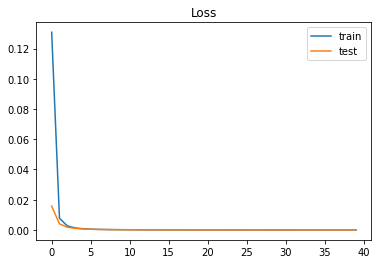

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()


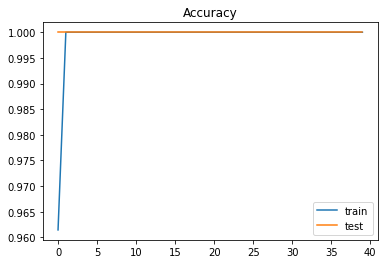

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()
